<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Reconstruct_BST_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconstruct BST

The pre-order traversal of a Binary Tree is a traversal technique that starts at the tree's root node and visits nodes in the following order:

Current node
Left subtree
Right subtree
Given a non-empty array of integers representing the pre-order traversal of a Binary Search Tree (BST), write a function that creates the relevant BST and returns its root node.

The input array will contain the values of BST nodes in the order in which these nodes would be visited with a pre-order traversal.

Each `BST` node has an integer `value`, a `left` child node, and a `right` child node. A node is said to be a valid `BST` node if and only if it satisfies the BST property: its `value` is strictly greater than the `values` of every node to its left; its value is less than or equal to the values of every node to its right; and its children nodes are either valid `BST` nodes themselves or `None` / `null`.

Sample Input

```
preOrderTraversalValues = [10, 4, 2, 1, 5, 17, 19, 18]
```



Sample Output

```
        10 
      /    \
     4      17
   /   \      \
  2     5     19
 /           /
1           18 
```



# Solution 1 : vanila BST insert 1 by 1

In [1]:
class BST:
	def __init__(self, value, left=None, right=None):
		self.value = value
		self.left = left
		self.right = right

	def insert(self, value):
		if value >= self.value:
			if self.right == None:
				self.right = BST(value)
			else:
				self.right.insert(value)
		else:
			if self.left == None:
				self.left = BST(value)
			else:
				self.left.insert(value)
			
# Time O(nlog(n))
# Space O(n)
def reconstructBst(preOrderTraversalValues):
	root = BST(preOrderTraversalValues[0])
	
	for i in range(1, len(preOrderTraversalValues)):
		root.insert(preOrderTraversalValues[i])

	return root

In [2]:
preOrderTraversalValues = [10, 4, 2, 1, 5, 17, 19, 18]
root = reconstructBst(preOrderTraversalValues)
print(root.value)
print(root.left.value)
print(root.right.value)

10
4
17


# Solution 2 : apply boundary

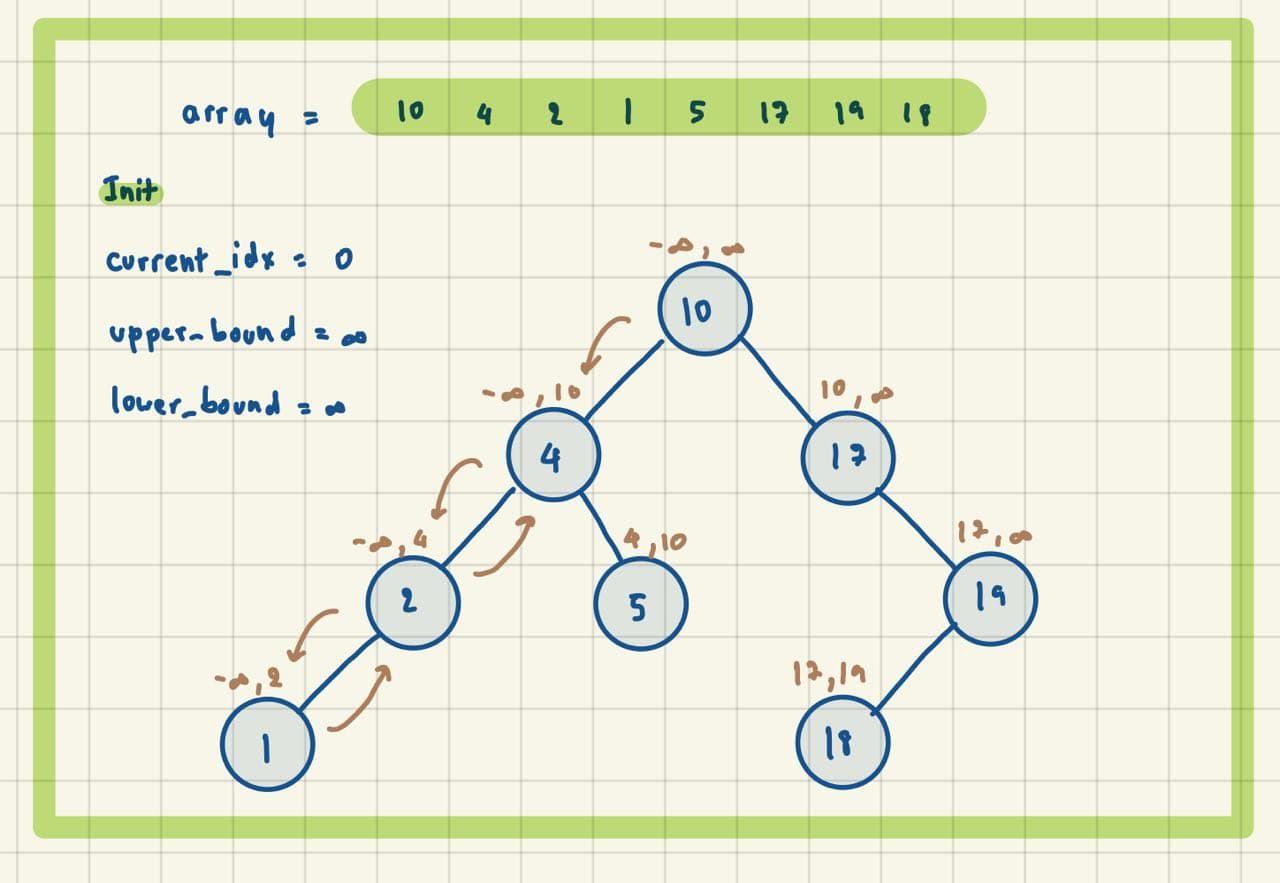

In [3]:
# Time O(n)
# Space O(n)

# This is an input class. Do not edit.
class BST:
	def __init__(self, value, left=None, right=None):
		self.value = value
		self.left = left
		self.right = right

def reconstructBst(preOrderTraversalValues):
	current_idx = 0
	root, _ = reconstruct_BST_helper(float('-inf'), float('inf'), preOrderTraversalValues, current_idx)
	return root

def reconstruct_BST_helper(lower_bound, upper_bound, preOrderTraversalValues, current_idx):
	if current_idx == len(preOrderTraversalValues):
		return None, current_idx

	root_value = preOrderTraversalValues[current_idx]
	if root_value < lower_bound or root_value >= upper_bound:
		return None, current_idx
	
	current_idx += 1
	left_tree, current_idx = reconstruct_BST_helper(lower_bound, root_value, preOrderTraversalValues, current_idx)
	right_tree, current_idx = reconstruct_BST_helper(root_value, upper_bound, preOrderTraversalValues, current_idx)
	return BST(root_value, left_tree, right_tree), current_idx

In [4]:
preOrderTraversalValues = [10, 4, 2, 1, 5, 17, 19, 18]
root = reconstructBst(preOrderTraversalValues)
print(root.value)
print(root.left.value)
print(root.right.value)

10
4
17


# Solution 3 : apply boundary and use current_idx as array

In [5]:
# Time O(n)
# Space O(n)

# This is an input class. Do not edit.
class BST:
	def __init__(self, value, left=None, right=None):
		self.value = value
		self.left = left
		self.right = right

def reconstructBst(preOrderTraversalValues):
	current_idx = [0]
	root = reconstruct_BST_helper(float('-inf'), float('inf'), preOrderTraversalValues, current_idx)
	return root

def reconstruct_BST_helper(lower_bound, upper_bound, preOrderTraversalValues, current_idx):
	if current_idx[0] == len(preOrderTraversalValues):
		return None

	root_value = preOrderTraversalValues[current_idx[0]]
	if root_value < lower_bound or root_value >= upper_bound:
		return None
	
	current_idx[0] += 1
	left_tree = reconstruct_BST_helper(lower_bound, root_value, preOrderTraversalValues, current_idx)
	right_tree = reconstruct_BST_helper(root_value, upper_bound, preOrderTraversalValues, current_idx)
	return BST(root_value, left_tree, right_tree)

In [6]:
preOrderTraversalValues = [10, 4, 2, 1, 5, 17, 19, 18]
root = reconstructBst(preOrderTraversalValues)
print(root.value)
print(root.left.value)
print(root.right.value)

10
4
17
